# Southeastern Woody Wetland Analysis
This notebook outlines the scripting for the SE woody wetland analysis created by nmtarr in 2017. 

Overall, the processing for this analysis takes weeks to run. Therefore, code was written in manageable top-level scripts to be run sequentially, although some steps can run simultaneously.  Each step/script is listed below.  Slow scripts are written in markdown as running them here would be impractical while faster steps are active code so that results can be previewed here.


### Required code
This repository includes an environment file (environment.pyl) that can be used to load most required packages with conda.

Additional code that is not available through pip or conda is needed as well:
arcpy 10.4.1
GAPAnalysis >=0.3 available at https://github.com/nmtarr/GAPAnalysis; 
GAPProduction >=1.5.1 available at https://github.com/nmtarr/GAPProduction


### Required data
To run this analysis, you need access to 
GAP habitat maps (https://www.sciencebase.gov/catalog/item/527d0a83e4b0850ea0518326)
GAP WHR Database
GAP Species Database
GAP analytic database
2001 GAP Land Cover (https://www.sciencebase.gov/catalog/item/5540e2d7e4b0a658d79395db)
Rasterized PAD-US data.

In [7]:
import os
os.chdir("P:/Proj3/USGap/Scripts/SE_Woody_Wetlands/")
%matplotlib inline

# List southeastern woody wetland ecological systems
The wildlife-centric habitat classification can be used to reduce the number of candidate systems by excluding systems without trees or saturated soils.  The following code does that and creates a csv file named "saturated systems with trees" that has to be reviewed by humans to make final decisions about what should be included.

execfile("DevelopSEWW-MUList.py")

# Review "Saturated systems with trees"
Save results in "Ecological systems of interest.csv"

# Map the ecological systems of interest
Create a binary map of the systems of interest with values of 1 (cell is a system of interest) and 0 (cell is not a system of interest). 

execfile("MapSEWW.py")

# Mask species richness maps to SE and SEWW
Maps of national species richness, southeastern species richness, and species richness in SEWW's are needed.  Mask national richness maps to get those.

execfile("MaskSpeciesRichness.py")

# Compare species richness on SEWW to CONUS and SE richness
Create figures that display comparison of species richness on SEWW to richness at other extents.

reptile
{'75th': 17, 'name': 'CONUS', '50th': 10, 'standard_deviation': 9.3509842650514, 'range': (1, 54), '25th': 6, 'mean': 12.53206006621209}
{'75th': 22, 'name': 'Southeast', '50th': 15, 'standard_deviation': 8.2160519881217, 'range': (1, 50), '25th': 10, 'mean': 16.78904524425563}
{'75th': 32, 'name': 'SEWW', '50th': 26, 'standard_deviation': 7.2821075872471, 'range': (1, 51), '25th': 20, 'mean': 25.63412363843866}
bird_winter
{'75th': 44, 'name': 'CONUS', '50th': 35, 'standard_deviation': 20.382840246725, 'range': (1, 143), '25th': 27, 'mean': 35.94103714752577}
{'75th': 56, 'name': 'Southeast', '50th': 49, 'standard_deviation': 12.567004685723, 'range': (1, 142), '25th': 42, 'mean': 48.87395660525394}
{'75th': 59, 'name': 'SEWW', '50th': 54, 'standard_deviation': 7.8500613342374, 'range': (3, 86), '25th': 48, 'mean': 53.863319427478956}
bird_summer
{'75th': 56, 'name': 'CONUS', '50th': 48, 'standard_deviation': 25.953168085337, 'range': (1, 127), '25th': 39, 'mean': 46.799930768

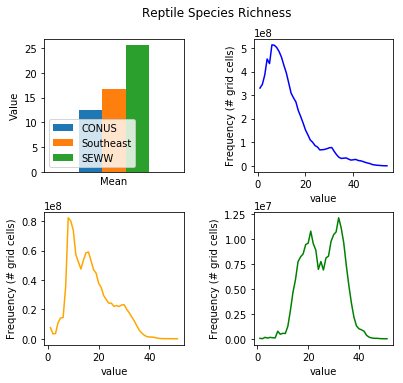

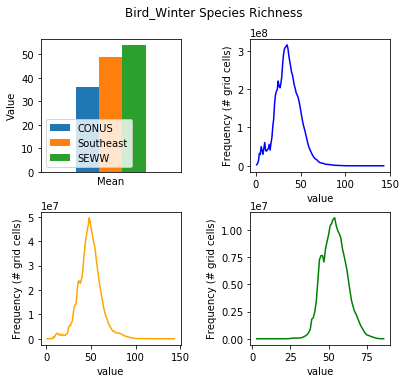

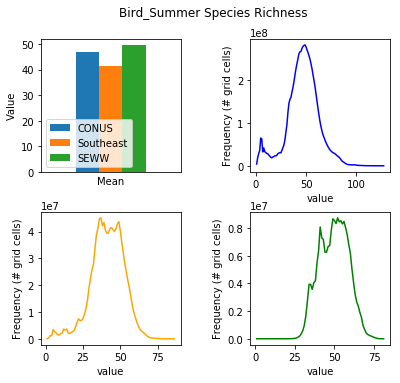

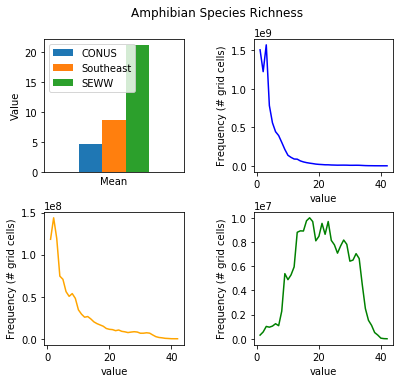

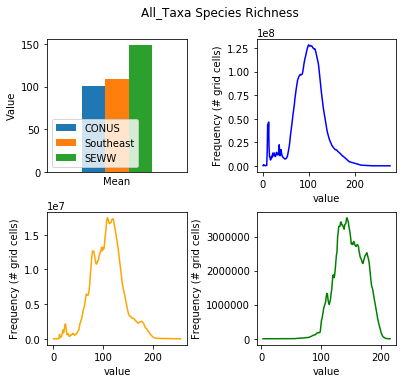

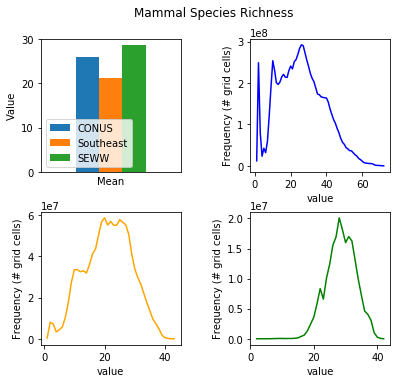

In [8]:
execfile("CompareRichness.py")

# Get species list for study region
Whittle down the list of species to apply the slow geoprocessing to.
The only species that need to be assessed are ones that are in the general study
region and are associated with one of the ecological systems of interest in the 
database OR are handmodeled.  This code seeks to build that list.

execfile("GetStudyRegionSpeciesList.py")

# Calculate percent habitat in SEWW for species
Overlay each species' habitat map with the binary map of SEWW's to determine how much of each species habitat is in SEWW's.  Results are saved in a table.
Note: this process would take about a month to run if species are assessed one at a time.  Therefore, the script is written so that (manually) be run in 4 separate groups; each group can be run in its own python shell using spyder.  Run time is a little over a week when doing that.

execfile("CalculatePercentHabitatInSEWW.py")

# Summarize species' overlap with SEWW's
The previous step produced a table that can be used for determining which species rely the most heavily on SEWW and summarizing the amount of habitat for species in SEWW.

When determining which species rely "the most", this script is currently set to use a 50% cutoff: species with >50% of their habitat in SEWW make the cut.

638 species use the systems of interest

87 species with more than 50.0% of winter habitat in SEWW:
	Atlantic Coast Slimy Salamander
	Brimley's Chorus Frog
	Bird-voiced Treefrog
	Chamberlain's Dwarf Salamander
	Dwarf Waterdog
	Florida Bog Frog
	Frosted Flatwoods Salamander
	Greater Siren
	Louisiana Slimy Salamander
	Little Grass Frog
	Many-lined Salamander
	Southern Cricket Frog
	Southern Dwarf Siren
	Savannah Slimy Salamander
	Great Egret
	Alligator Snapping Turtle
	Cottonmouth
	Eastern Musk Turtle
	Mississippi Green Watersnake
	Plain-bellied Watersnake
	Red-bellied Mudsnake
	Striped Mud Turtle
	Mole Salamander
	Reticulated Flatwoods Salamander
	Small-mouthed Salamander
	Southern Dusky Salamander
	Squirrel Treefrog
	Striped Newt
	Three-toed Amphiuma
	Two-toed Amphiuma
	Great Crested Flycatcher
	Prothonotary Warbler
	Purple Gallinule
	Swamp Rabbit
	Black Swampsnake
	Chicken Turtle
	Eastern Mud Turtle
	Escambia Map Turtle
	Florida Crowned Snake
	Graham's Crayfish Snake
	Island Glass Liz

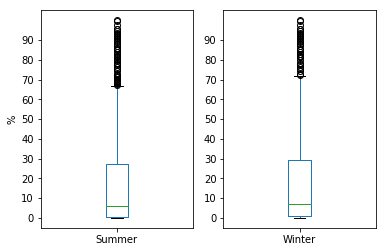

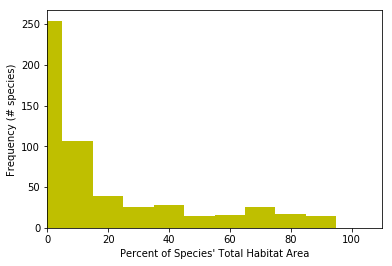

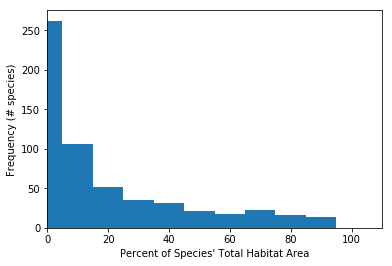

In [9]:
execfile("SummarizeOverlap.py")

# Map richness of top SEWW species for summer and winter
With the species with >50% of their habitat in SEWW identified, we can now map their richness.

execfile("MapSEWWSpeciesRichness.py")

# Assess the protection of SEWW systems and species
Determine how much of each SEWW system and SEWW species' habitat is in each of the GAP protection classes.

This script takes over an hour to run.

execfile("AssessProtection.py")

# Build pyramids for raster layers
Pyramids enable faster viewing of data layers, but not they take a long time to create.

execfile("BuildPyramids.py")